## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>


## Open-Ended Reflection Questions

### 1. Training Dynamics
*Focus on MLP and LSTM implementations.*

**Did your models show signs of overfitting or underfitting? What changes could address this?**

Both models show **overfitting**, with LSTM overfitting more strongly.

- **MLP:** by the end of training, train Macro F1 reached about 0.7879 while validation Macro F1 was about 0.7121 This indicates moderate overfitting.
- **LSTM:** train Macro F1 reached about 0.8717 while validation Macro F1 was about 0.7394, showing a larger train/validation gap.

Potential fixes:
- stop earlier (stronger early stopping patience),
- use learning-rate decay earlier,
- reduce model capacity (especially LSTM hidden size/layers),

**How did class weights affect training stability and final performance?**

Using class weights in CrossEntropyLoss improved macro-level balance by helping minority classes receive stronger gradients. This improved the final performance but somehow increased the training noises.



#### Q1 Figures: Training Dynamics (MLP vs LSTM)

**MLP Learning Curves**

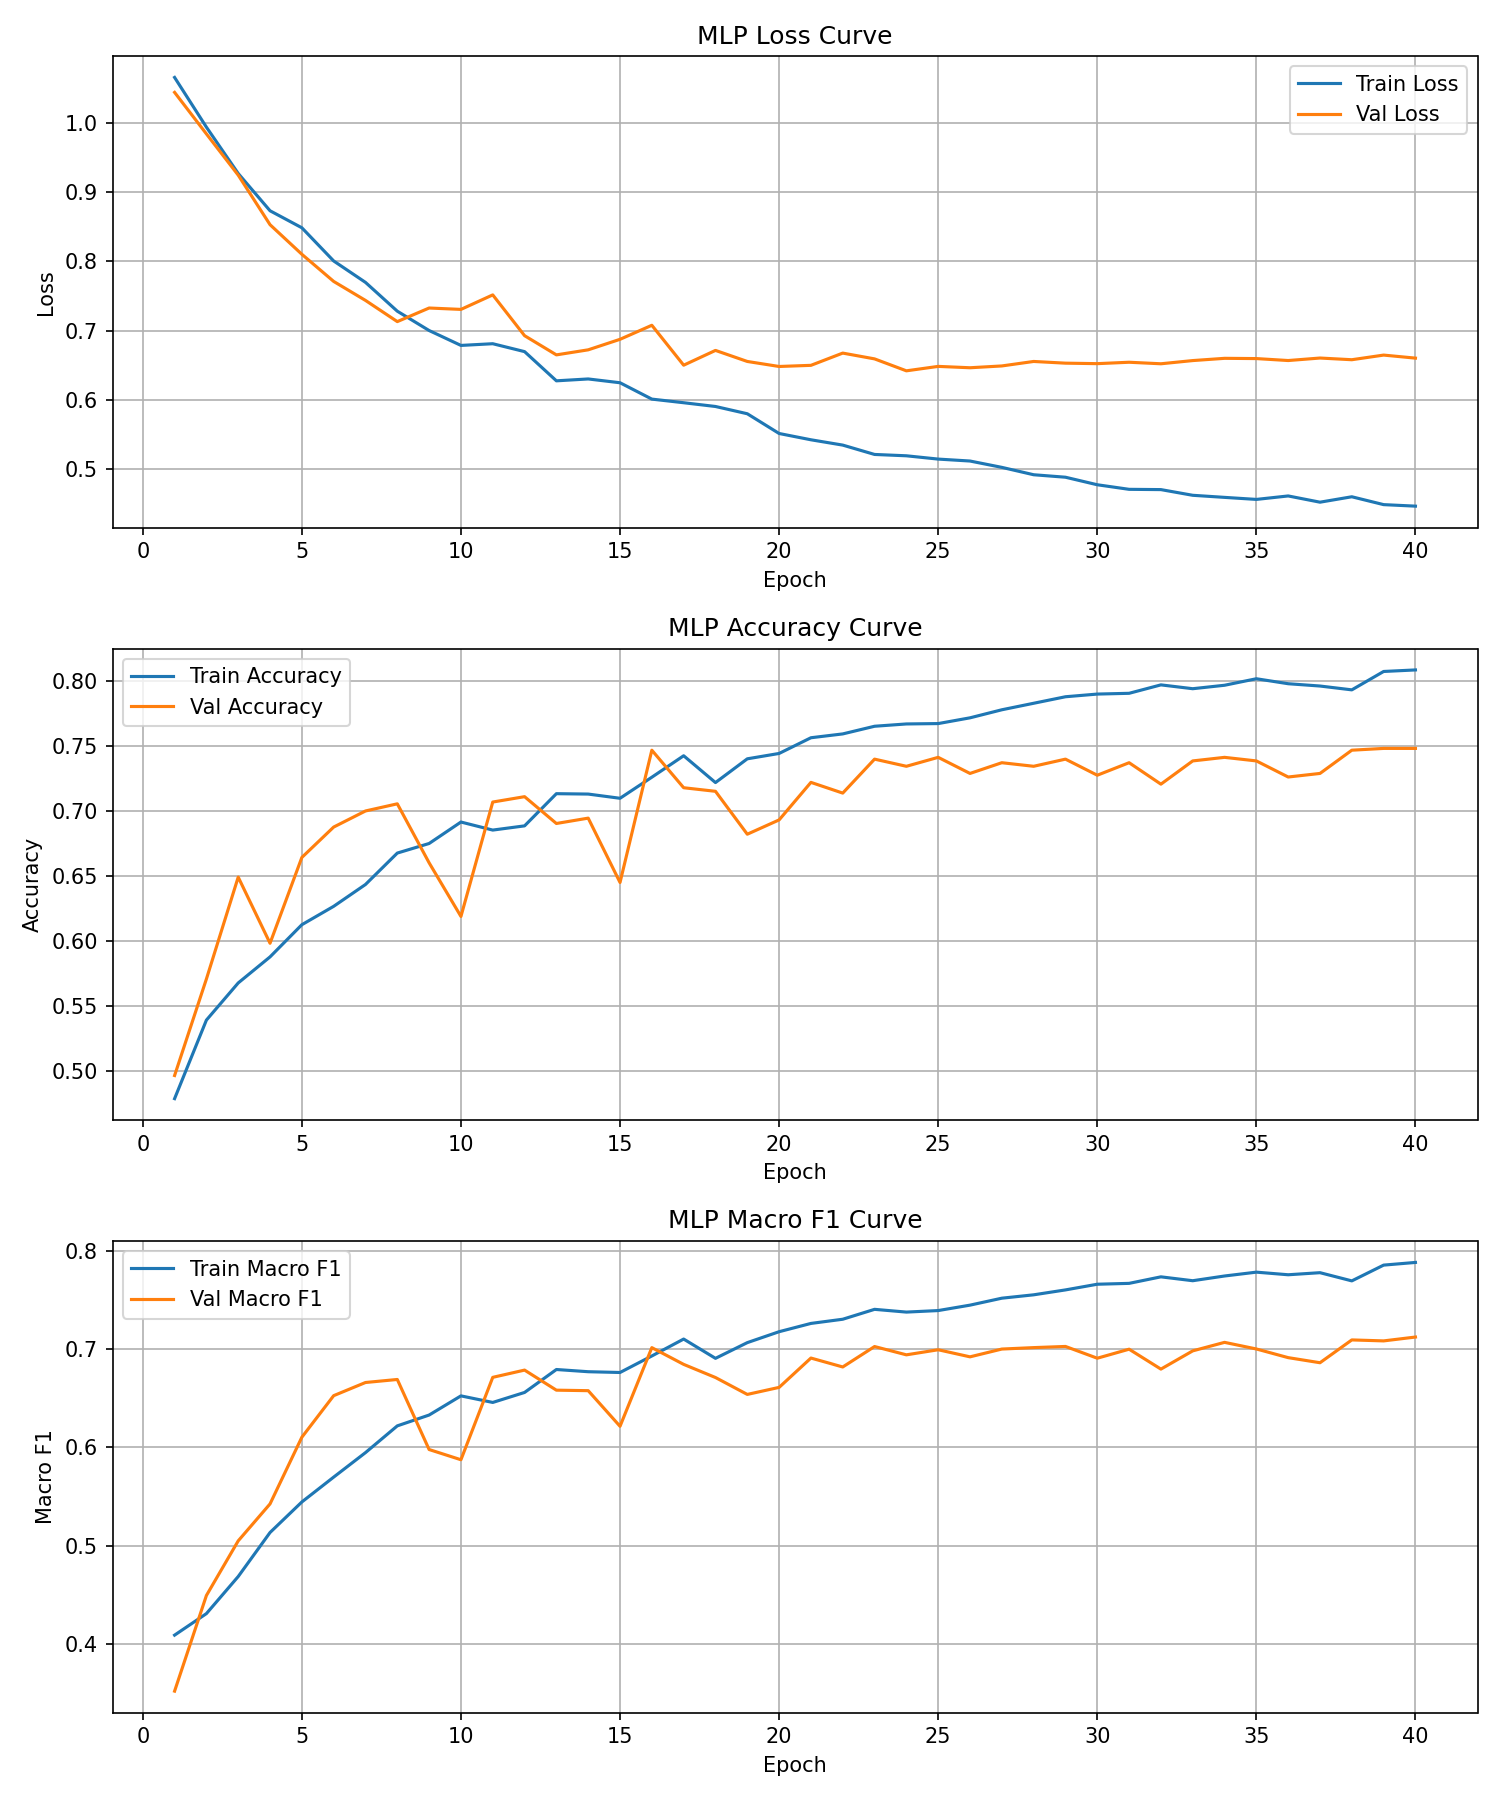

**LSTM Learning Curves**

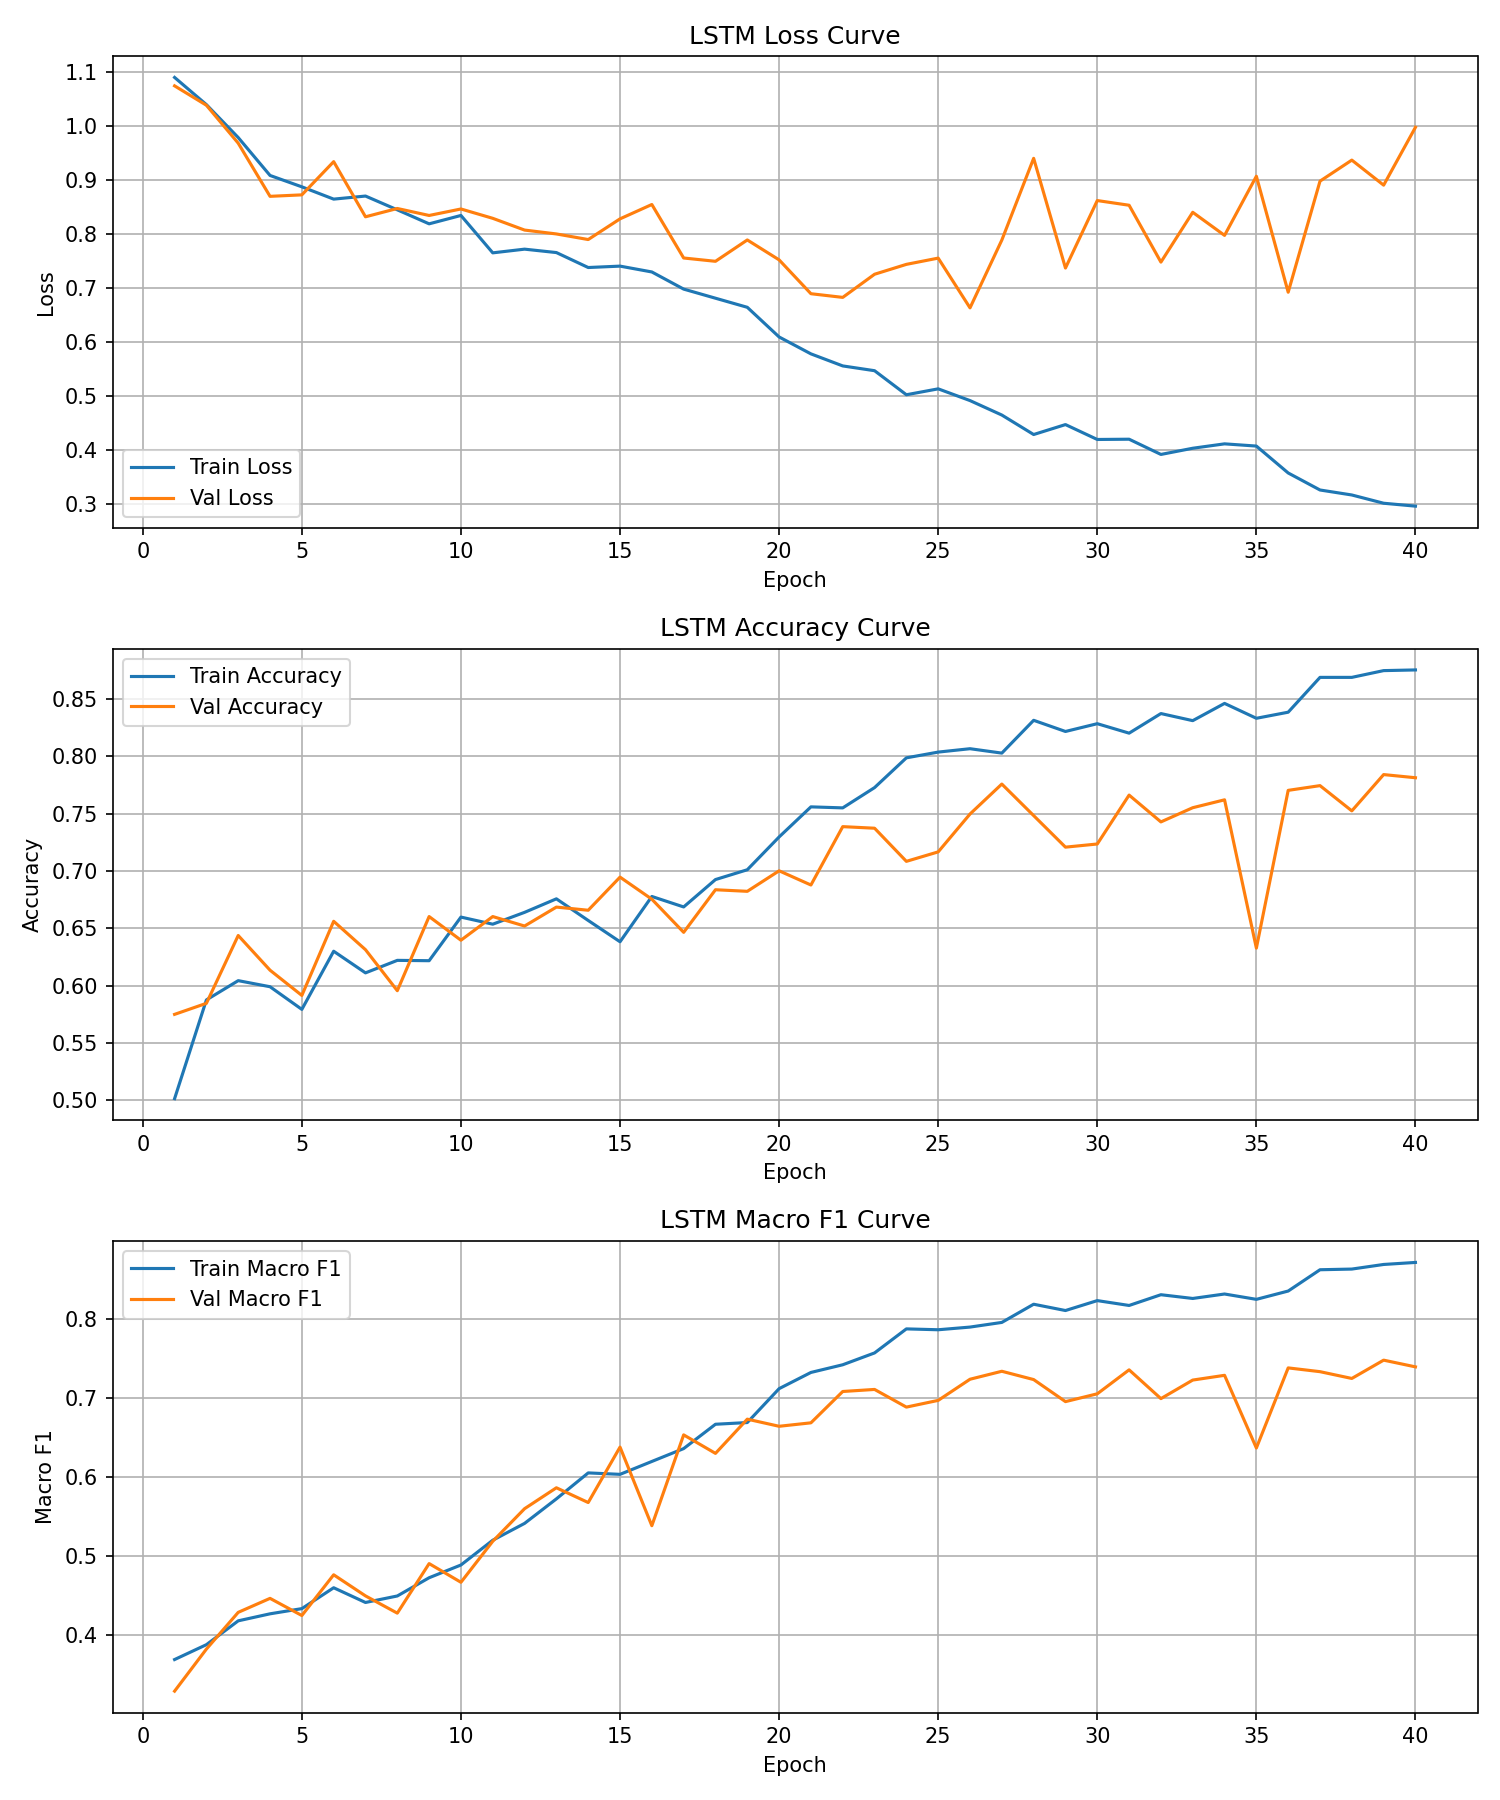

In [2]:
from pathlib import Path
from IPython.display import Image, Markdown, display

base = Path('outputs')
display(Markdown('#### Q1 Figures: Training Dynamics (MLP vs LSTM)'))
for title, name in [
    ('MLP Learning Curves', 'mlp_learning_curves.png'),
    ('LSTM Learning Curves', 'lstm_learning_curves.png'),
]:
    path = base / name
    display(Markdown(f"**{title}**"))
    if path.exists():
        display(Image(filename=str(path)))
    else:
        display(Markdown(f"Missing: `{path}`"))


### 2. Model Performance and Error Analysis
*Focus on MLP and LSTM implementations.*

**Which model generalized better to the test set? Evidence from metrics:**

The **LSTM generalized better** than the MLP on test data.

- **MLP:** Test Accuracy = **0.7098**, Test Macro F1 = **0.6797**
- **LSTM:** Test Accuracy = **0.7607**, Test Macro F1 = **0.7333**

This supports that sequence modeling with LSTM captured useful order/context information beyond mean pooling.

**Which sentiment class was most frequently misclassified? Why?**

By error rate, the **positive class** was hardest for both models:

- MLP positive recall: **0.6569**
- LSTM positive recall: **0.6275**

Likely reasons:
- financial text often uses subtle positive language,
- class imbalance biases boundaries toward neutral predictions.

#### Q2 Figures: Error Analysis (MLP vs LSTM Confusion Matrices)

**MLP Confusion Matrix**

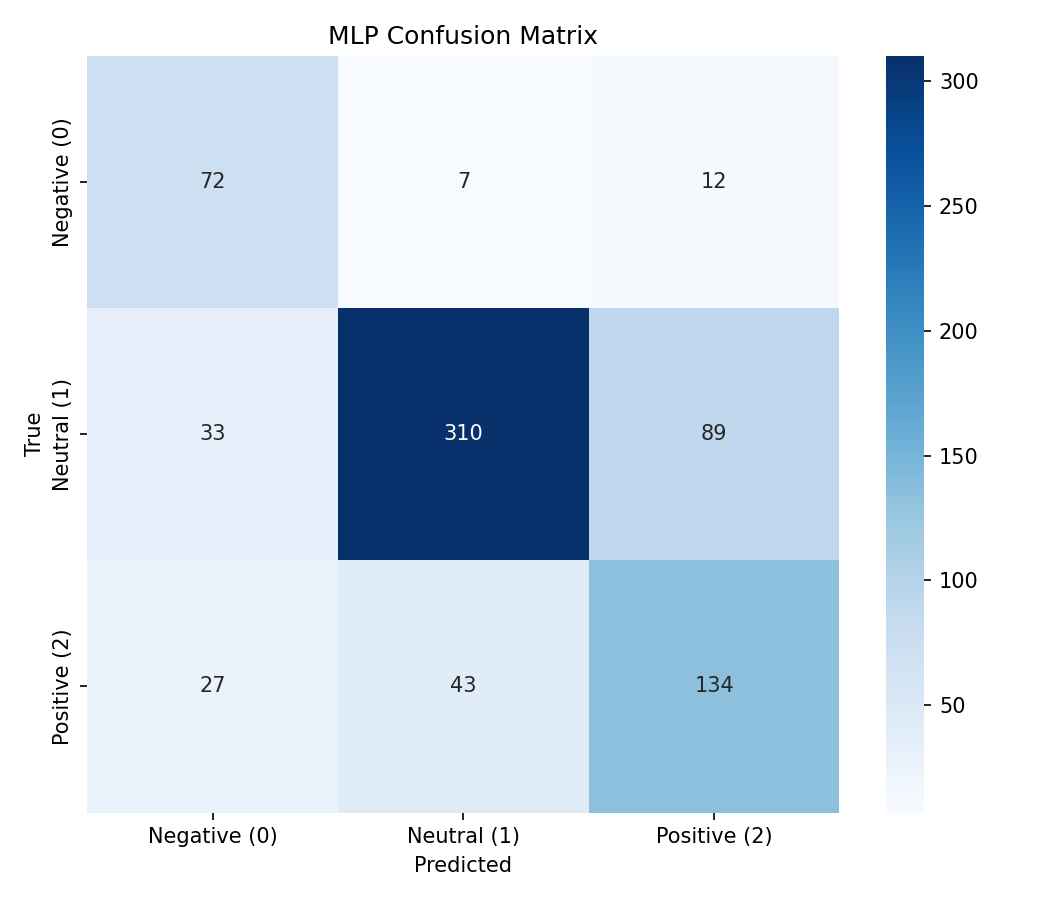

**LSTM Confusion Matrix**

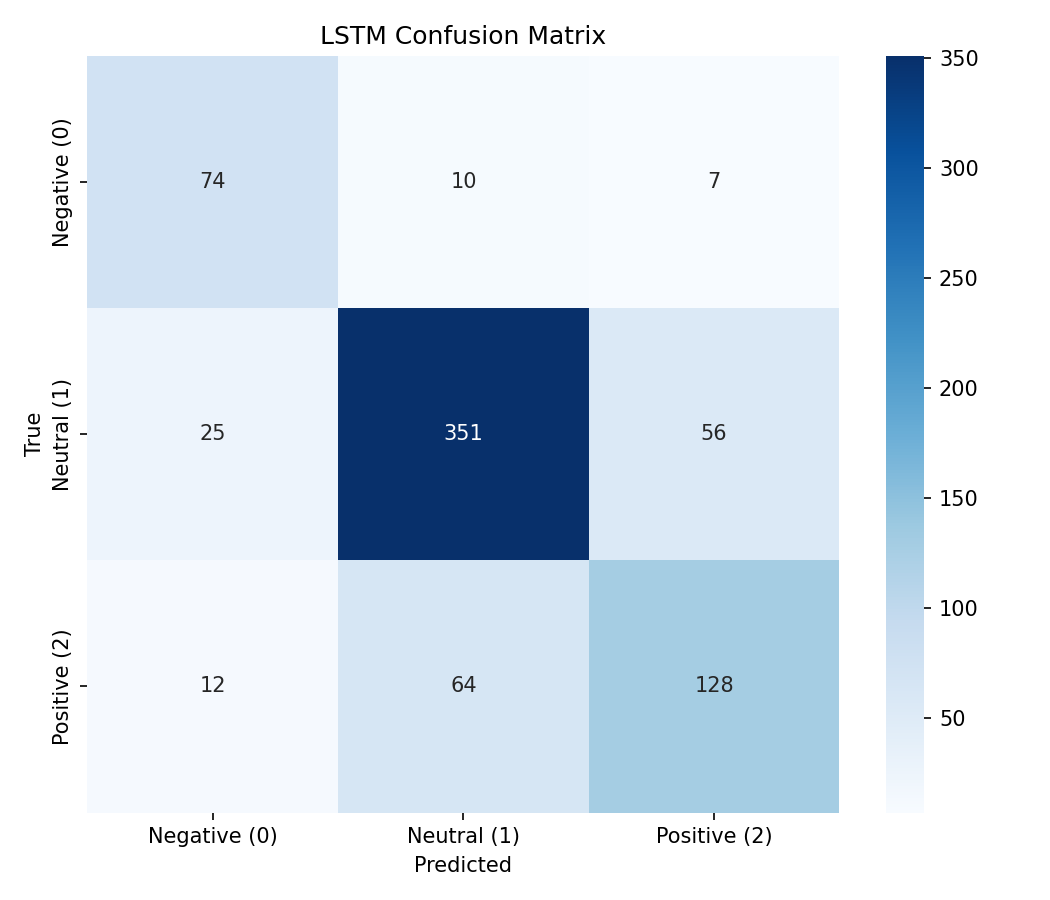

In [3]:
from pathlib import Path
from IPython.display import Image, Markdown, display

base = Path('outputs')
display(Markdown('#### Q2 Figures: Error Analysis (MLP vs LSTM Confusion Matrices)'))
for title, name in [
    ('MLP Confusion Matrix', 'mlp_confusion_matrix.png'),
    ('LSTM Confusion Matrix', 'lstm_confusion_matrix.png'),
]:
    path = base / name
    display(Markdown(f"**{title}**"))
    if path.exists():
        display(Image(filename=str(path)))
    else:
        display(Markdown(f"Missing: `{path}`"))


### 3. Cross-Model Comparison
*Compare MLP, RNN, LSTM, GRU, BERT, GPT.*

**How did mean-pooled FastText embeddings limit the MLP compared to sequence-based models?**

Mean pooling compresses an entire sentence into one context vector. This removes token order, so MLP decisions rely mostly on global averages. As a result, MLP struggles more when the infromation depends on sequence patterns rather than keyword presence.

**What advantage did LSTM sequential processing provide over MLP?**

The LSTM preserves token order and updates hidden state across positions, so it can model temporal dependencies and sentiment shifts. This improved generalization in our results.

**Did fine-tuned LLMs (BERT/GPT) outperform classical baselines? Why?**

Yes. Fine-tuned BERT/GPT clearly outperformed MLP/RNN/LSTM/GRU:

- BERT Test Macro F1 = **0.7912**
- GPT Test Macro F1 = **0.7913**
- Best classical baseline (LSTM) = **0.7333**

Main reason: BERT/GPT start from large-scale pretraining and produce contextual token representations, enabling better handling of semantic information. Classical models depend on narrower task-specific learning and less expressive representations.

**Rank all six models by test performance and explain factors.**

Ranking by **Test Macro F1** (high to low):

1. **GPT** — 0.7913
2. **BERT** — 0.7912
3. **LSTM** — 0.7333
4. **GRU** — 0.7264
5. **MLP** — 0.6797
6. **RNN** — 0.6758

Interpretation:
- GPT/BERT lead due to pretrained contextual representations and strong transfer learning.
- LSTM/GRU are next because sequence modeling captures order and compositional sentiment.
- MLP and vanilla RNN trail because they either remove order (MLP) or have weaker long-range sequence modeling (basic RNN).



#### Q3 Figure: Test Macro F1 Ranking Across Six Models

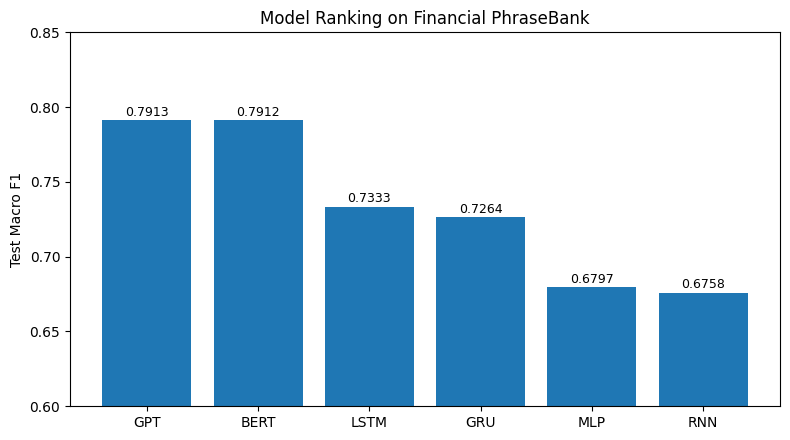

#### Q3 Supporting Confusion Matrices (All Models)

**RNN Confusion Matrix**

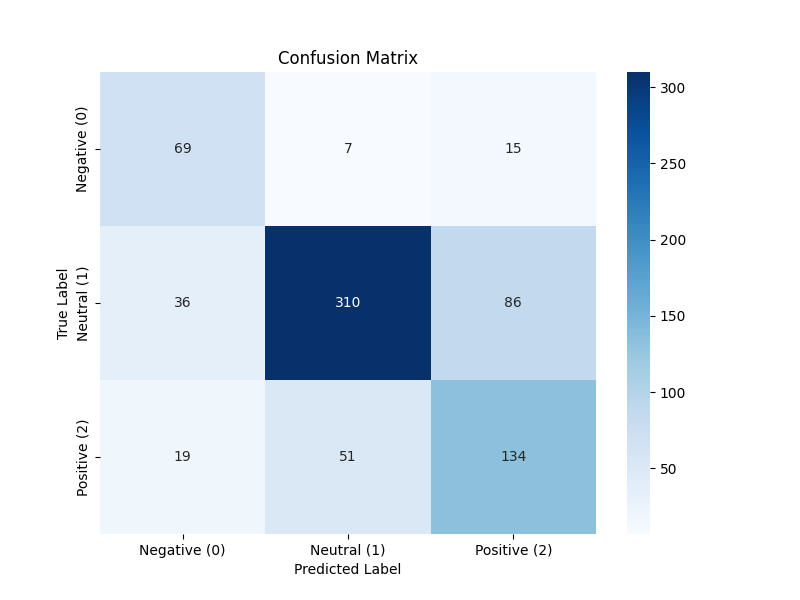

**GRU Confusion Matrix**

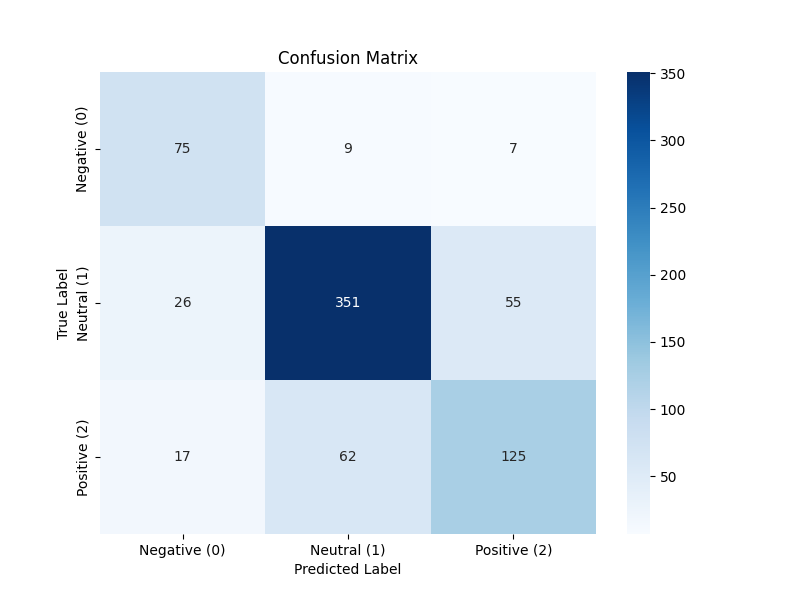

**BERT Confusion Matrix**

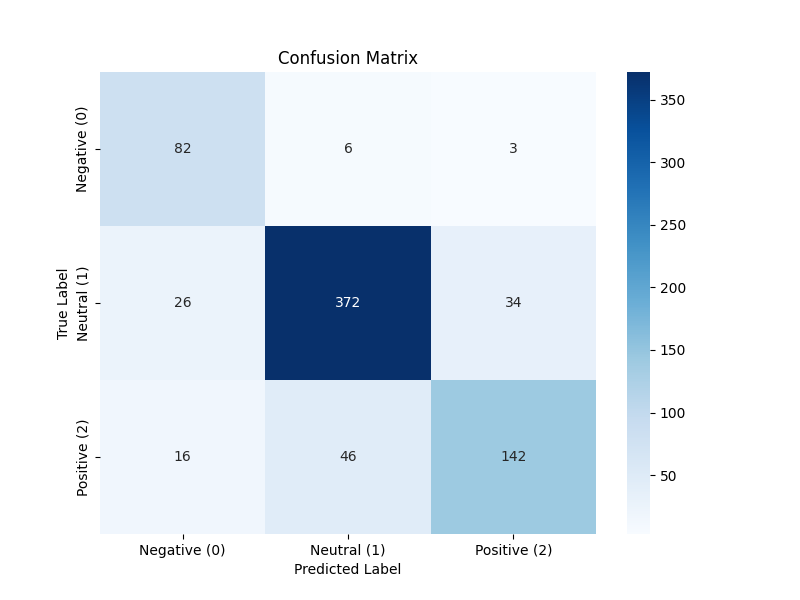

**GPT Confusion Matrix**

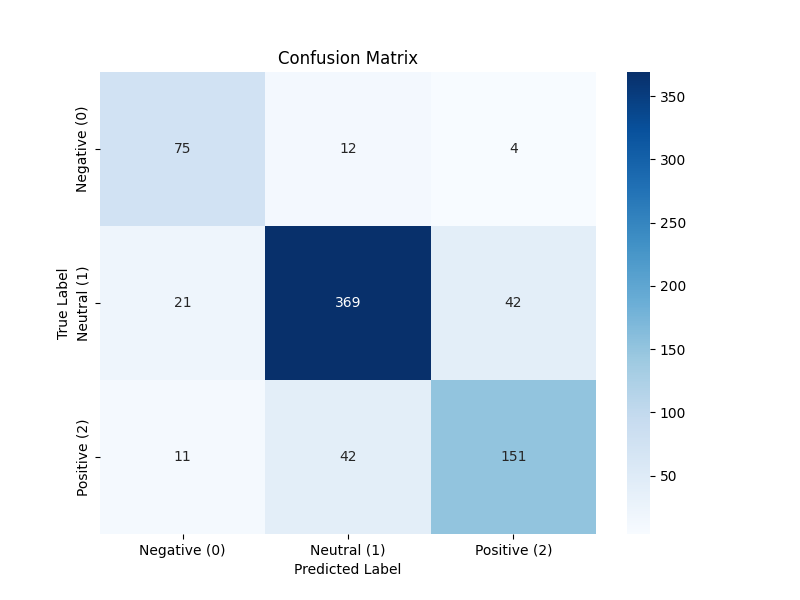

In [4]:
from pathlib import Path
from IPython.display import Image, Markdown, display
import matplotlib.pyplot as plt

display(Markdown('#### Q3 Figure: Test Macro F1 Ranking Across Six Models'))
scores = {
    'MLP': 0.6797,
    'RNN': 0.6758,
    'LSTM': 0.7333,
    'GRU': 0.7264,
    'BERT': 0.7912,
    'GPT': 0.7913,
}
ordered = sorted(scores.items(), key=lambda x: x[1], reverse=True)
models = [k for k, _ in ordered]
vals = [v for _, v in ordered]

plt.figure(figsize=(8, 4.5))
bars = plt.bar(models, vals)
plt.ylim(0.60, 0.85)
plt.ylabel('Test Macro F1')
plt.title('Model Ranking on Financial PhraseBank')
for b, v in zip(bars, vals):
    plt.text(b.get_x() + b.get_width()/2, v + 0.003, f'{v:.4f}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

base = Path('outputs')
display(Markdown('#### Q3 Supporting Confusion Matrices (All Models)'))
for title, name in [
    ('RNN Confusion Matrix', 'rnn_confusion_matrix.png'),
    ('GRU Confusion Matrix', 'gru_confusion_matrix.png'),
    ('BERT Confusion Matrix', 'bert_confusion_matrix.png'),
    ('GPT Confusion Matrix', 'gpt_confusion_matrix.png'),
]:
    path = base / name
    display(Markdown(f"**{title}**"))
    if path.exists():
        display(Image(filename=str(path)))
    else:
        display(Markdown(f"Missing: `{path}`"))
